<a href="https://colab.research.google.com/github/5dogs/data-science/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# 基本操作
import pandas as pd
import numpy as np
from google.colab import drive
import os
import shutil

# 可視化
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ロジスティック回帰
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# その他
import re
import datetime
import warnings
import random

# %matplotlib inline

In [12]:
# ファイルパス
# dir_path = "/content/drive/MyDrive/ColabNotebooks/Customer Personality Analysis/"
dir_path = "/content/"
file_name = "m_c_shorten.csv"

# データの読み込み
df = pd.read_csv(
    dir_path + file_name,
    sep='\t',                   # タブ区切りの指定
    parse_dates=['Dt_Customer'], # 'Dt_Customer'を日付型として読み込む
    index_col='ID',             # 'ID'をインデックスとして設定
    encoding='utf-8'            # エンコーディングの指定（必要に応じて調整）
)

# データの先頭5行を表示
print(df.head(1))

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
ID                                              ...                      
5524  04-09-2012       58       635         88  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
ID                                                                           
5524             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
ID                                                  
5524         0              3         11         1  

[1 rows x 28 columns]


In [ ]:
# データ型の確認
dtype_sr = df.dtypes
print(dtype_sr)

# 欠損値の数
nullcnt_sr = df.isnull().sum()
print(nullcnt_sr)


Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
Year_Birth             0
Education              0
Marital_Status         0
Income                 9
Kidhome           

素のやつ  
データ全選択→png保存→pdf出力

In [ ]:
# prompt: 各インデックスをすべて可視化したものをすべてまとめて一つのファイルにし、ダウンロードしたい

import matplotlib.pyplot as plt
# 各列のヒストグラムをプロット
for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:  # 数値データのみヒストグラムを作成
    plt.figure()
    df[col].hist()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.savefig(f'{col}_histogram.png')  # ヒストグラムを画像ファイルとして保存
    plt.close()

# 各列の箱ひげ図をプロット
for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:  # 数値データのみ箱ひげ図を作成
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.savefig(f'{col}_boxplot.png')  # 箱ひげ図を画像ファイルとして保存
    plt.close()

# 各列の散布図をプロット（数値データ同士の組み合わせ）
numeric_cols = df.select_dtypes(include=['number']).columns
for i in range(len(numeric_cols)):
  for j in range(i + 1, len(numeric_cols)):
    col1 = numeric_cols[i]
    col2 = numeric_cols[j]
    plt.figure()
    plt.scatter(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter plot of {col1} vs {col2}')
    plt.savefig(f'{col1}_vs_{col2}_scatter.png')  # 散布図を画像ファイルとして保存
    plt.close()

# 各列のヒストグラムと箱ひげ図を一つのPDFファイルにまとめる
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('all_plots.pdf') as pdf:
  for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
      # ヒストグラム
      plt.figure()
      df[col].hist()
      plt.xlabel(col)
      plt.ylabel('Frequency')
      plt.title(f'Histogram of {col}')
      pdf.savefig()  # PDFに保存
      plt.close()

      # 箱ひげ図
      plt.figure()
      df.boxplot(column=col)
      plt.title(f'Boxplot of {col}')
      pdf.savefig()  # PDFに保存
      plt.close()

  # 散布図
  for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
      col1 = numeric_cols[i]
      col2 = numeric_cols[j]
      plt.figure()
      plt.scatter(df[col1], df[col2])
      plt.xlabel(col1)
      plt.ylabel(col2)
      plt.title(f'Scatter plot of {col1} vs {col2}')
      pdf.savefig()  # PDFに保存
      plt.close()

# ファイルをダウンロード
from google.colab import files
files.download('all_plots.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# カラム名指定で

In [ ]:
import matplotlib.pyplot as plt

# ID列を指定
id_columns = ['ID1', 'ID2']  # ここに対象のID列名をリストとして指定

for col in id_columns:
    if col in df.columns and df[col].dtype in ['int64', 'float64']:  # 数値データかつ指定したID列であるか確認
        plt.figure()
        df[col].hist()
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {col}')
        plt.savefig(f'{col}_histogram.png')  # ヒストグラムを画像ファイルとして保存
        plt.close()

# ファイルをダウンロード
from google.colab import files
files.download('all_plots.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 欠損値の数

In [ ]:
nullcnt_sr = df.isnull().sum()
print(nullcnt_sr)


Year_Birth             0
Education              0
Marital_Status         0
Income                 9
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


以下colab環境限定osのやつ  
FPDF*installもある*

In [ ]:
import matplotlib.pyplot as plt
import os

# fpdfのインストール（必要な場合）
try:
    from fpdf import FPDF
except ModuleNotFoundError:
    !pip install fpdf
    from fpdf import FPDF

# 保存するフォルダの名前
output_folder = 'graphs'
os.makedirs(output_folder, exist_ok=True)

# ID列を指定
id_columns = ['AcceptedCmp1', 'AcceptedCmp2']

for col in id_columns:
    if col in df.columns:
        # 円グラフを作成
        value_counts = df[col].value_counts()
        plt.figure()
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title(f'Pie chart of {col}')
        plt.savefig(os.path.join(output_folder, f'{col}_pie_chart.png'))
        plt.close()

# PNGファイルをPDFにまとめる
pdf = FPDF()
for file_name in os.listdir(output_folder):
    if file_name.endswith('.png'):
        pdf.add_page()
        pdf.image(os.path.join(output_folder, file_name), x=10, y=10, w=180)  # 画像をPDFに追加

pdf_output_path = os.path.join(output_folder, 'combined_plots.pdf')
pdf.output(pdf_output_path)

# PDFをダウンロード
from google.colab import files
files.download(pdf_output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

response(最後のキャンペーンで反応したか否か)を決定木で判別


      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
ID                                              ...                      
5524  04-09-2012       58       635         88  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
ID                                                                           
5524             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
ID                                                  
5524         0              3         11         1  

[1 rows x 28 columns]
<bound method NDFrame.head of        Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                          

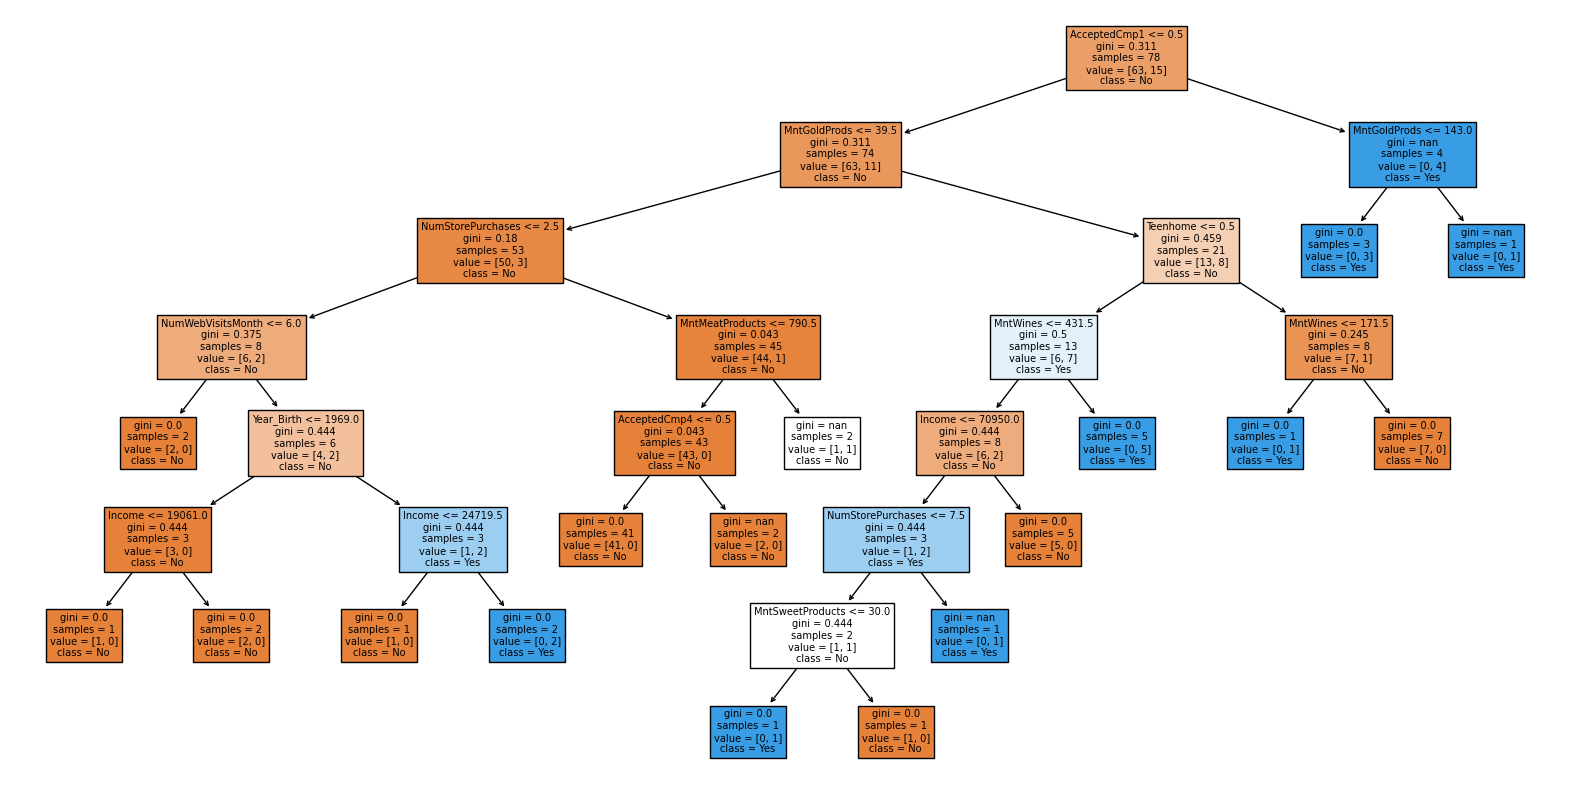

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import files  # Colab用のファイル操作モジュールをインポート


# ファイルパス
# dir_path = "/content/drive/MyDrive/ColabNotebooks/Customer Personality Analysis/"
dir_path = "/content/"
file_name = "m_c_shorten.csv"

# データの読み込み
df = pd.read_csv(
    dir_path + file_name,
    sep='\t',                   # タブ区切りの指定
    parse_dates=['Dt_Customer'], # 'Dt_Customer'を日付型として読み込む
    index_col='ID',             # 'ID'をインデックスとして設定
    encoding='utf-8'            # エンコーディングの指定（必要に応じて調整）
)

# カテゴリカル変数のエンコーディング
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

# 不要な列を削除
df = df.drop(columns=['Dt_Customer'])  # IDや日付は特徴量として使わない＿'ID',

# 特徴量とターゲットの分離
X = df.drop(columns=['Response'])
y = df['Response']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木モデルの訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 決定木の視覚化
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
plt.savefig('decision_tree_visualization.png')  # 画像をファイルに保存

files.download('decision_tree_visualization.png')


In [10]:
print(df.head)


<bound method NDFrame.head of        Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
ID                                                                             
5524         1957  58138.0        0         0  04-09-2012       58       635   
2174         1954  46344.0        1         1  08-03-2014       38        11   
4141         1965  71613.0        0         0  21-08-2013       26       426   
6182         1984  26646.0        1         0  10-02-2014       26        11   
5324         1981  58293.0        1         0  19-01-2014       94       173   
...           ...      ...      ...       ...         ...      ...       ...   
11178        1972  42394.0        1         0  23-03-2014       69        15   
2230         1970  23626.0        1         0  24-05-2014       84        27   
7516         1983  30096.0        1         0  22-05-2014       30         5   
7247         1960  47916.0        0         1  22-11-2012       72       505   
11100     

In [ ]:
# jupyter labの場合

# JupyterLabからファイルをダウンロード
from IPython.display import FileLink

# ダウンロードリンクの表示
FileLink('decision_tree_visualization.png')